In [262]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score


In [131]:
songs_df = pd.read_csv(r"C:\Users\Marvin\Documents\WBS\Data-Science-Bootcamp\6_Unsupervised ML\Data\6.3.3_spotify_5000_songs.csv")
songs_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [132]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [331]:
song_features_df = songs_df.loc[:,"danceability ":"duration_ms "]
song_features_df = song_features_df.drop(["type ", "key ", "loudness ", "speechiness ", "duration_ms "], axis=1)
song_features_df

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
0,0.6580,0.25900,0,0.694,0.000059,0.9750,0.3060,110.376
1,0.7420,0.39900,1,0.217,0.000002,0.1070,0.6930,125.039
2,0.8510,0.73000,1,0.453,0.000063,0.1240,0.9050,93.698
3,0.7050,0.05020,1,0.879,0.000041,0.3860,0.5240,106.802
4,0.6510,0.11900,1,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...
5230,0.2020,0.06940,1,0.917,0.715000,0.0832,0.0655,87.906
5231,0.1880,0.10100,1,0.855,0.426000,0.0694,0.0355,83.134
5232,0.0596,0.00093,1,0.951,0.969000,0.0772,0.0344,71.573
5233,0.1330,0.02080,1,0.883,0.505000,0.1110,0.0591,67.109


In [332]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_song_features_df = my_min_max.fit_transform(song_features_df)

In [351]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 25, random_state = 50)

# 3. fit the model to the data
my_kmeans.fit(scaled_song_features_df) 

# 4. obtain the cluster output
clusters = my_kmeans.labels_

# 5. attach the cluster output to our original DataFrame
scaled_song_features_df["cluster"] = clusters

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [352]:
scaled_song_features_df

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.680455,0.25900,0.0,0.696787,0.000060,0.987842,0.310660,0.515800,18
1,0.767322,0.39900,1.0,0.217871,0.000002,0.108409,0.703553,0.584322,7
2,0.880041,0.73000,1.0,0.454819,0.000064,0.125633,0.918782,0.437862,7
3,0.729059,0.05020,1.0,0.882530,0.000041,0.391084,0.531980,0.499098,4
4,0.673216,0.11900,1.0,0.919679,0.000348,0.105370,0.408122,0.565171,14
...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,1.0,0.920683,0.725888,0.084296,0.066497,0.410795,3
5231,0.194416,0.10100,1.0,0.858434,0.432487,0.070314,0.036041,0.388495,3
5232,0.061634,0.00093,1.0,0.954819,0.983756,0.078217,0.034924,0.334469,3
5233,0.137539,0.02080,1.0,0.886546,0.512690,0.112462,0.060000,0.313608,3


In [353]:
scaled_song_features_df[["cluster"]].sort_values(by='cluster')

,cluster
5118,0
2721,0
2775,0
348,0
346,0
...,...
1916,24
1919,24
1921,24
1895,24


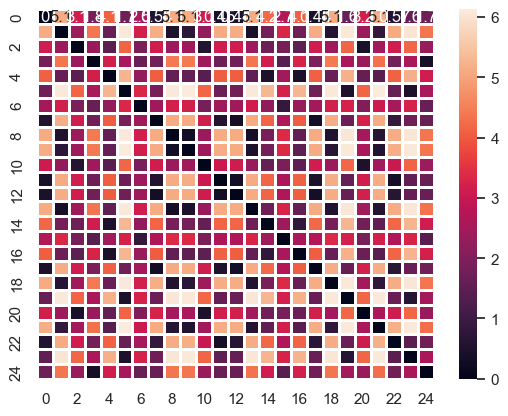

In [354]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [355]:
scaled_song_features_df.groupby(by="cluster").mean()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,
0,0.605285,0.830938,1.0,0.112526,0.031277,0.510531,0.555745,0.588964
1,0.416282,0.879758,0.0,0.022277,0.035116,0.196181,0.234062,0.587149
2,0.470089,0.839023,1.0,0.041124,0.815413,0.216179,0.513941,0.600279
3,0.251771,0.107845,1.0,0.941304,0.848644,0.143169,0.095309,0.439898
4,0.564946,0.405126,1.0,0.648357,0.037014,0.171293,0.451215,0.552214
5,0.257140,0.907153,0.0,0.009145,0.864545,0.193768,0.221218,0.571247
6,0.505614,0.205592,0.0,0.875999,0.063309,0.177264,0.345058,0.517205
7,0.748921,0.660691,1.0,0.291262,0.021561,0.146074,0.835072,0.535844
8,0.633569,0.824099,0.0,0.074664,0.029536,0.189767,0.673062,0.644612


In [356]:
scaled_song_features_df.columns

Index(['danceability ', 'energy   ', 'mode ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ', 'cluster'],
      dtype='object')

In [358]:
# State the label for each arm of the chart
categories = ["danceability", "energy", "mode", "acousticness",
 "instrumentalness", "valence", "liveness", "tempo"]

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(scaled_song_features_df['cluster'].unique()):
  cluster_song_means = go.Scatterpolar(
    r=[scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'danceability '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'energy   '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'mode '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'acousticness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'instrumentalness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'valence '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'liveness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'tempo   '].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_song_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean song feature by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

Cluster 0 = energy, 549 songs --> Death Metal, Electronic Pop

Cluster 1 = acousticness & valence & danceability, 454 songs --> Jazz, Swing, Pop, Gospel

Cluster 2 = acousticness & instrumentalness & key, 339 songs --> Instrumental, Piano

Clsuter 3 = key & danceabilit & valence & energy, 979 songs --> Reggae, Reggaeton, Dance

Cluster 4 = energy & key, 586 songs --> Heavy Metal, Dance/Electronic

Cluster 5 = energy & instrumentalness, 405 songs --> Doomer, Grime Core

Cluster 6 = acousticness & key, 373 songs --> Singer Songwriter, Classic, Jazz

Cluster 7 = valence & energy & danceability, 792 songs --> Disco, Dance-Pop, Reggeaton

Cluster 8 = acousticness & instrumentalness, 263 songs --> Piano

Cluster 9 = energy & instrumentalness & key, 495 songs --> Death Metal

In [260]:
sample = scaled_song_features_df[scaled_song_features_df['cluster'] == 9].sample()

In [261]:
songs_df.loc[songs_df["Unnamed: 0"]== sample.index[0]]

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
3444,3444,These Walls Shall Be Your Grave ...,Brutality,0.225,0.952,11,-10.497,1,0.11,0.000017,0.928,0.349,0.136,138.685,,276173,4,3EjNZuQqmUUuEEM1rXBxcn,https://open.spotify.com/track/3EjNZuQqmUUuEEM...


## Choose right number of clusters (K)

In [277]:
# Decide on a random_state to use
seed = 100

# Set the maximum number of clusters to try
max_k = 5230

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_song_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning:

Number of distinct clusters (5158) found smaller than n_clusters (5159). Possibly due to duplicate points in X.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning:

Number of distinct clusters (5158) found smaller than n_clusters (5160). Possibly due to duplicate points in X.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning:

Number of distinct clusters (5158) found smaller than n_clusters (5161). Possibly due to duplicate points in X.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning:

Number of distinct clusters (5158) found smaller than n_clusters (5162). Possibly due to duplicate points in X.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning:

Number of distinct clusters (5158) found smaller than

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



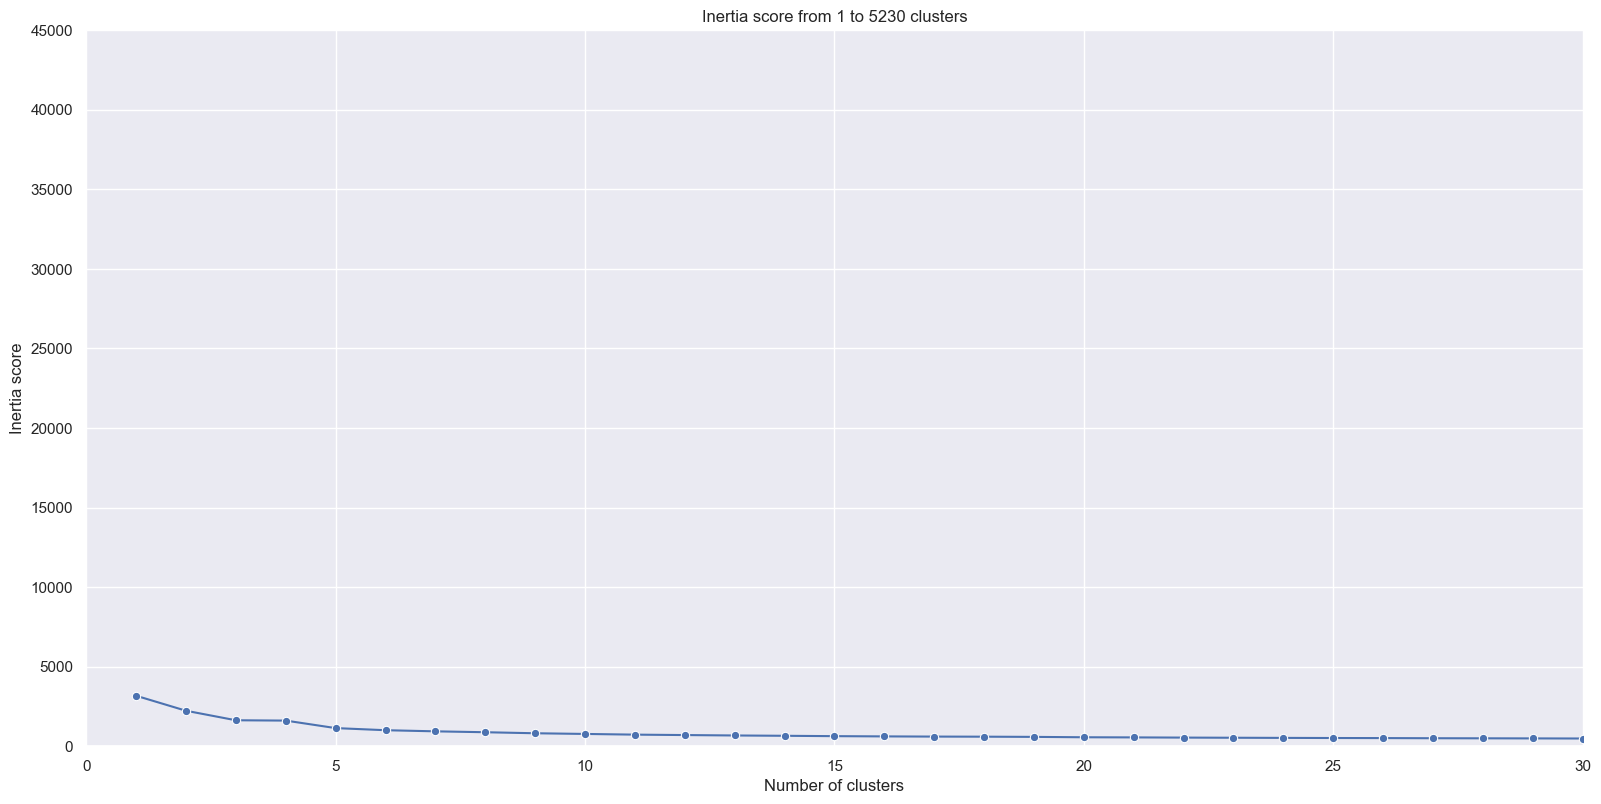

In [278]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
# Set the limits of the x and y axes
.set(xlim=(0, 30), ylim=(0, 45000))
);

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



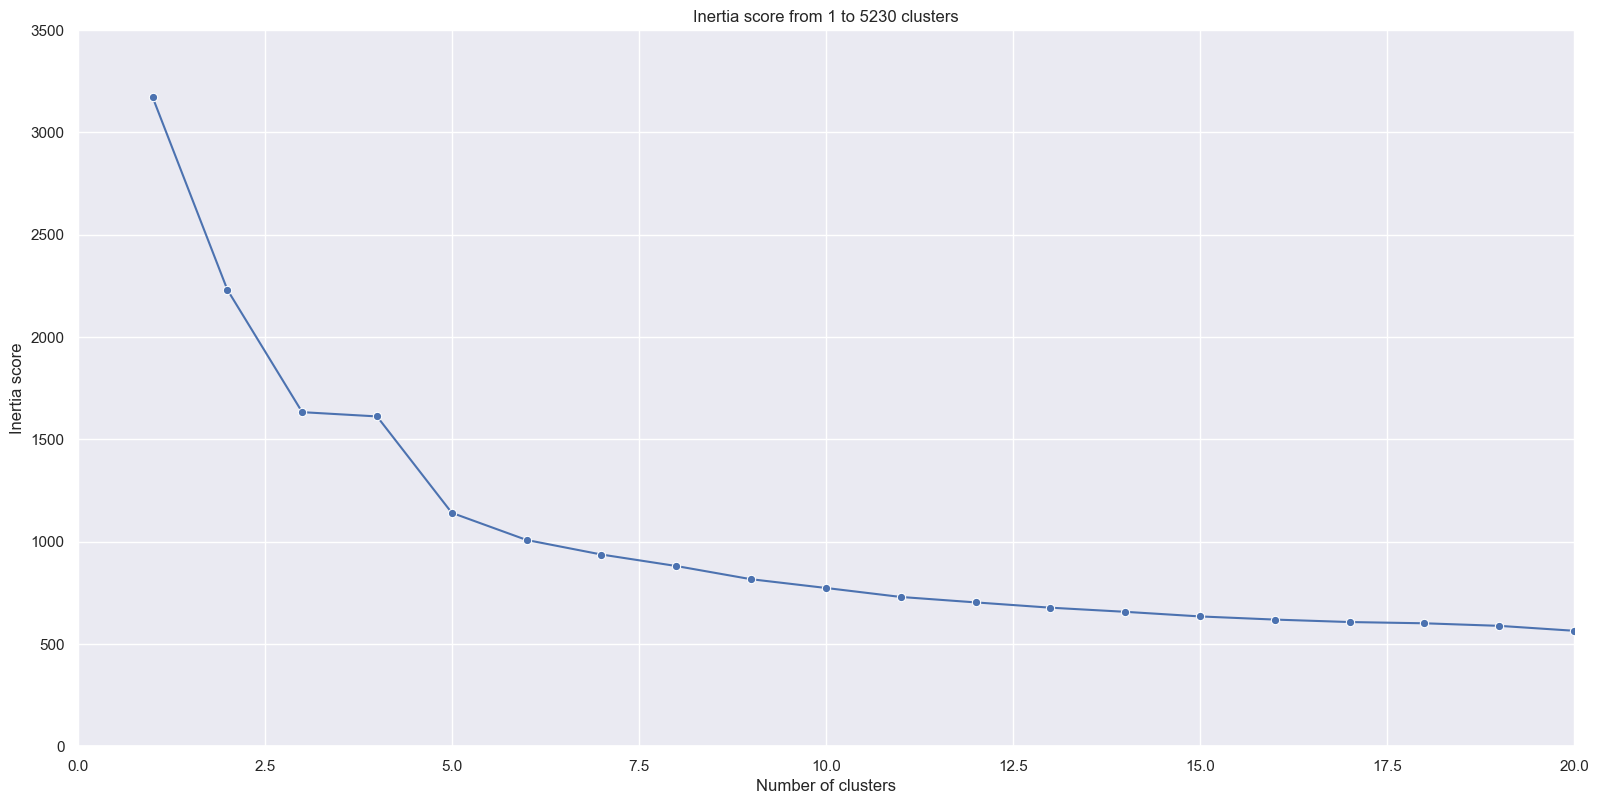

In [290]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
# Set the limits of the x and y axes
.set(xlim=(0, 20), ylim=(0, 3500))
);

In [343]:
# Decide on a random_state to use
seed = 50

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_song_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



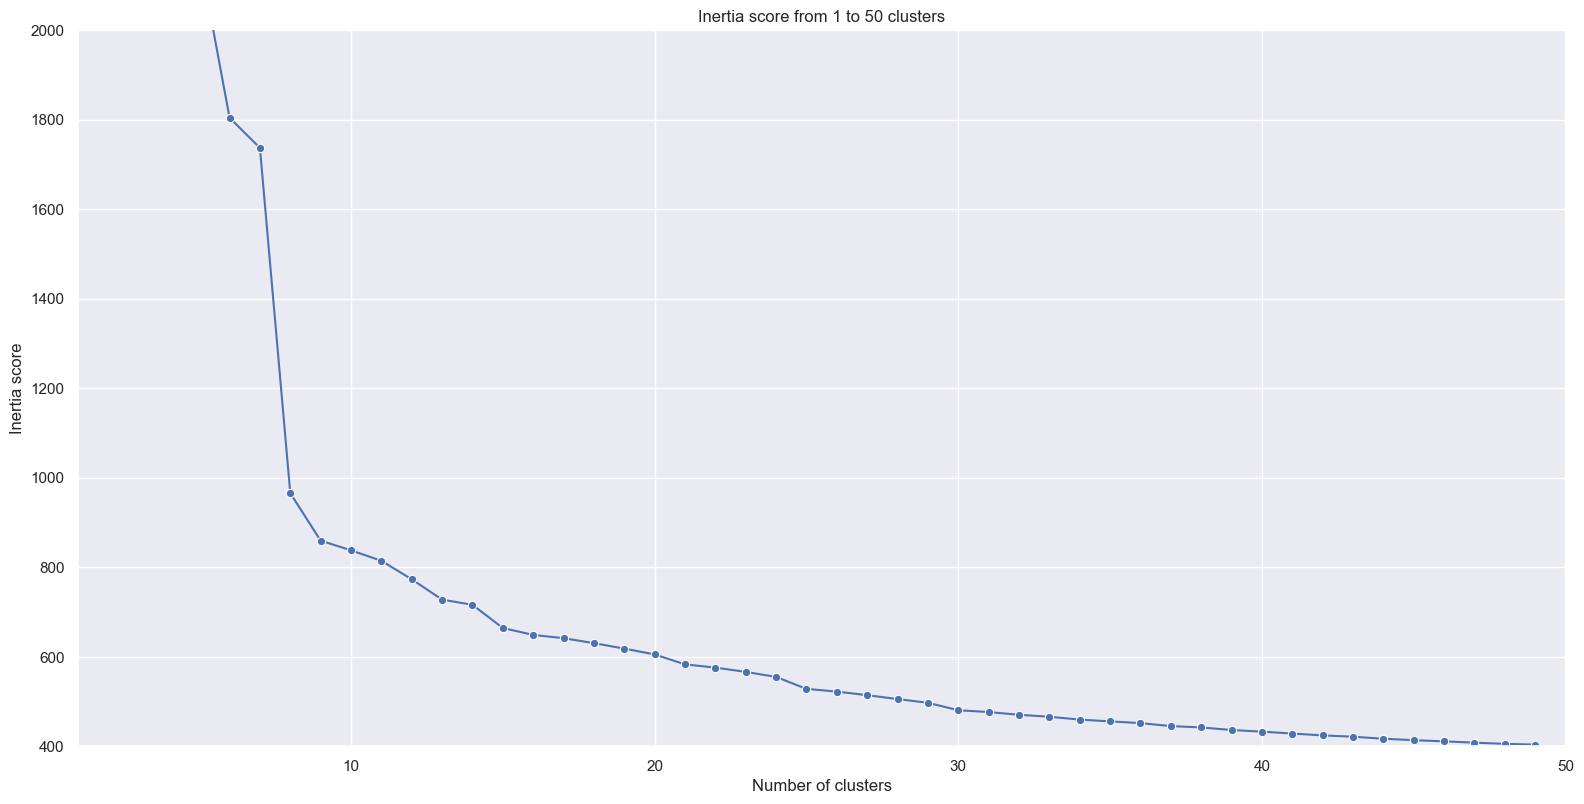

In [350]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
# Set the limits of the x and y axes
.set(xlim=(1, 50), ylim=(400, 2000))
);

In [360]:
# Calculate the Euclidean distances between all pairs of students in the foods_df DataFrame
distances_array = pairwise_distances(scaled_song_features_df, metric='euclidean')

# Create a Pandas DataFrame from the distances_array
euclidean_distances_df = pd.DataFrame(distances_array,
                                      index=scaled_song_features_df.index,
                                      columns=scaled_song_features_df.index,)

# Display the Euclidean distances DataFrame
euclidean_distances_df  #.astype(int) #

,0,1,2,3,4,5,6,7,8,9,...,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234
0,0.000000,11.099053,11.110334,14.052966,4.226112,4.236016,12.048674,2.386326,11.093467,2.505093,...,4.254632,15.102134,6.217715,3.295820,3.293994,15.090471,15.080046,15.113574,15.083776,15.064269
1,11.099053,0.000000,0.496469,3.111511,7.047513,7.054496,1.673650,9.043692,0.334989,9.031868,...,7.081582,4.276631,17.045216,8.170879,8.191333,4.228223,4.183272,4.321773,4.211544,4.142563
2,11.110334,0.496469,0.000000,3.145106,7.064672,7.074383,1.672106,9.027638,0.518801,9.020010,...,7.118820,4.339106,17.055237,8.192443,8.220443,4.284800,4.242682,4.383278,4.272770,4.190825
3,14.052966,3.111511,3.145106,0.000000,10.005527,10.010808,2.305771,12.031836,3.105199,12.038117,...,10.038386,1.570732,20.025768,11.097249,11.102970,1.455280,1.355395,1.671185,1.395847,1.228254
4,4.226112,7.047513,7.064672,10.005527,0.000000,0.269947,8.079937,2.244028,7.040927,2.189295,...,0.744952,11.055074,10.042982,1.720305,1.741321,11.040174,11.026829,11.070209,11.033798,11.022017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,15.090471,4.228223,4.284800,1.455280,11.040174,11.027389,3.278648,13.083064,4.203814,13.050377,...,11.025165,0.176665,21.004099,12.050432,12.043360,0.000000,0.304611,0.317639,0.253679,0.433838
5231,15.080046,4.183272,4.242682,1.355395,11.026829,11.018209,3.273294,13.070661,4.166363,13.044350,...,11.009547,0.457005,21.008860,12.060624,12.045187,0.304611,0.000000,0.586358,0.157634,0.380558
5232,15.113574,4.321773,4.383278,1.671185,11.070209,11.052162,3.348402,13.111287,4.295876,13.073298,...,11.045914,0.176705,21.007477,12.055070,12.046310,0.317639,0.586358,0.000000,0.484724,0.678403
5233,15.083776,4.211544,4.272770,1.395847,11.033798,11.023859,3.283526,13.076711,4.197780,13.052361,...,11.014319,0.384918,21.008939,12.060337,12.043107,0.253679,0.157634,0.484724,0.000000,0.364984


In [362]:
scaled_song_features_df.columns

Index(['danceability ', 'energy   ', 'mode ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ', 'cluster'],
      dtype='object')

In [365]:
import plotly.graph_objects as go

#

# Extract the features for plotting
x = scaled_song_features_df['energy   ']
y = scaled_song_features_df['danceability ']
z = scaled_song_features_df['tempo   ']
student_names = scaled_song_features_df.index

# Extract the centroids for the selected features
centroid_x = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('energy   ')]
centroid_y = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('danceability ')]
centroid_z = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('tempo   ')]

# Create a 3D scatter plot for data points
fig = go.Figure()

# Add data points to the plot, with the student names
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    text=student_names,
    mode='markers+text',  # Enable marker and text mode
    marker=dict(
        size=3,
        color=scaled_song_features_df['cluster'],  # Color points by the cluster assignment
        colorscale='Viridis',
        opacity=0.8
    ),
    hoverinfo='text',
    name='Data Points'
))

# Add centroids to the plot as large, semi-transparent points
fig.add_trace(go.Scatter3d(
    x=centroid_x, y=centroid_y, z=centroid_z,
    mode='markers',
    marker=dict(
        size=10,
        color=[i for i in range(len(centroid_x))],  # Use a distinct color for each centroid
        colorscale='Viridis',
        opacity=0.9
    ),
    name='Centroids'
))

# Update the layout of the plot
fig.update_layout(
    width=1000,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    title='3D Scatter Plot for KMeans Clusters with Student Names',
    scene=dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Tempo'
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()
